In [1]:
# if running this code in a Jupter notbeook or JupyterLab
%matplotlib ipympl

import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# For the underlying grid
grid_size = 50
# create one-dimensional arrays for x and y
x = np.arange(grid_size+1)
y = np.arange(grid_size+1)
# create the mesh based on these arrays
X, Y = np.meshgrid(x, y)

# For the circle
neighbors = 50
theta = np.linspace(0, 2 * np.pi , 50)
radius = 20

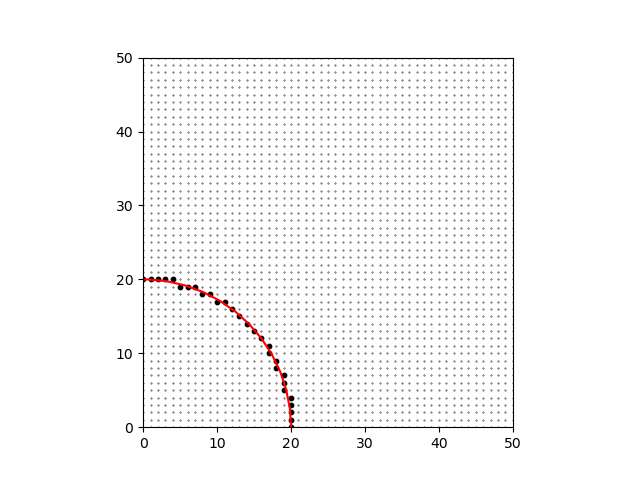

In [3]:
def circle(x_c, y_c):
    a = radius * np.cos( theta[:,None] )
    b = radius * np.sin( theta[:,None] )
    return np.hstack((a+x_c, b+y_c))

def ceil_x(x_c, y_c):
    points = circle(x_c, y_c)
    x_pts = points[:,0]
    return np.ceil(x_pts)

def ceil_y(x, x_c, y_c):
    points = circle(x_c, y_c)
    y_pts = points[:,1]
    return np.ceil(y_pts)

def floor_x(x_c, y_c):
    points = circle(x_c, y_c)
    x_pts = points[:,0]
    return np.floor(x_pts)

def floor_y(x, x_c, y_c):
    points = circle(x_c, y_c)
    y_pts = points[:,1]
    return np.floor(y_pts)

def cir_bound(cx, cy):
    r = radius + 0.5
    top     = int(np.ceil(cy - r))
    bottom  = int(np.floor(cy + r))
    
    y = np.arange(top, bottom+1)[:, None]
    dy = y-cy
    dx = np.floor(np.sqrt(r*r - dy*dy))
    left = np.hstack((cx - dx, y))
    right = np.hstack((cx + dx, y))
    return np.vstack((left,right))

def circle_bx(x_c, y_c):
    return cir_bound(x_c, y_c)[:,0]

def circle_by(x, x_c, y_c):
    return cir_bound(x_c, y_c)[:,1]

def cir_bound2(x_c, y_c):
    x_c = np.round(x_c)
    y_c = np.round(y_c)
    r = radius + 0.5
    rads = np.arange(0, np.floor(r * np.sqrt(0.5))+1)[:, None]
    d = np.floor( np.sqrt( r*r - rads*rads  ) )
    d = d.astype(int)
    a1 = np.hstack((x_c - d, y_c + rads))
    a2 = np.hstack((x_c + d, y_c + rads))
    a3 = np.hstack((x_c - d, y_c - rads))
    a4 = np.hstack((x_c + d, y_c - rads))
    a5 = np.hstack((x_c + rads, y_c - d))
    a6 = np.hstack((x_c + rads, y_c + d))
    a7 = np.hstack((x_c - rads, y_c - d))
    a8 = np.hstack((x_c - rads, y_c + d))
    points = np.vstack((a1, a2, a3, a4, a5, a6, a7, a8))
    return np.unique(points, axis=0).astype(int)

def circle_bx2(x_c, y_c):
    return cir_bound2(x_c, y_c)[:,0]

def circle_by2(x, x_c, y_c):
    return cir_bound2(x_c, y_c)[:,1]

fig, ax = plt.subplots()
controls = iplt.plot(circle, c='r', x_c=(0,grid_size,500), y_c=(0,grid_size,500), parametric=True,
                     xlim = [0, grid_size], ylim=[0, grid_size])
plt.scatter(X,Y, s=0.1, c='k')
# iplt.scatter(ceil_x, ceil_y, c='r', s=5, controls=controls,
#                     xlim = [0, grid_size], ylim=[0, grid_size])
# iplt.scatter(floor_x, floor_y, c='g', s=5, controls=controls,
#                     xlim = [0, grid_size], ylim=[0, grid_size])
# iplt.scatter(floor_x, ceil_y, c='b', s=5, controls=controls,
#                     xlim = [0, grid_size], ylim=[0, grid_size])      
# iplt.scatter(ceil_x, floor_y, c='y', s=5, controls=controls,
#                     xlim = [0, grid_size], ylim=[0, grid_size])
# iplt.scatter(circle_bx, circle_by, c='g', s=20, controls=controls,
#                     xlim = [0, grid_size], ylim=[0, grid_size]) 
iplt.scatter(circle_bx2, circle_by2, c='k', s=10, controls=controls,
                    xlim = [0, grid_size], ylim=[0, grid_size]) 
ax.set_aspect(1)

In [6]:
xc = 25.38
yc = 24.87
points = circle(xc, yc)
cc = np.hstack((ceil_x(xc, yc)[:,None], ceil_y(_, xc, yc)[:,None]))
ff = np.hstack((floor_x(xc, yc)[:,None], floor_y(_, xc, yc)[:,None]))
cf = np.hstack((ceil_x(xc, yc)[:,None], floor_y(_, xc, yc)[:,None]))
fc = np.hstack((floor_x(xc, yc)[:,None], ceil_y(_, xc, yc)[:,None]))

ccd = np.sqrt((points - cc) ** 2 + (points - cc) ** 2)
ffd = np.sqrt((points - ff) ** 2 + (points - ff) ** 2)
cfd = np.sqrt((points - cf) ** 2 + (points - cf) ** 2)
fcd = np.sqrt((points - fc) ** 2 + (points - fc) ** 2)

print(np.max(ccd)*5)
print(np.max(ffd)*5)
print(np.max(cfd)*5)
print(np.max(fcd)*5)

6.922352285493308
6.879125515346095
6.922352285493308
6.7644870952977465


In [ ]:
cx= 0
cy= 0
top     = int(np.ceil(cy - radius))
bottom  = int(np.floor(cy + radius))
r = radius + 0.5
y = np.arange(top, bottom+1)[:, None]
dy = y-cy
dx = np.floor(np.sqrt(radius*radius - dy*dy))
left = np.hstack((cx - dx, y))
right = np.hstack((cx + dx, y))
circle_bound = np.vstack((left,right))


In [ ]:
x_c = np.round(x_c)
y_c = np.round(y_c)
r = radius + 0.5
rads = np.arange(0, np.floor(r * np.sqrt(0.5))+1)[:, None]
d = np.floor( np.sqrt( r*r - rads*rads  ) )
d = d.astype(int)
a1 = np.hstack((x_c - d, y_c + rads))
a2 = np.hstack((x_c + d, y_c + rads))
a3 = np.hstack((x_c - d, y_c - rads))
a4 = np.hstack((x_c + d, y_c - rads))
a5 = np.hstack((x_c + rads, y_c - d))
a6 = np.hstack((x_c + rads, y_c + d))
a7 = np.hstack((x_c - rads, y_c - d))
a8 = np.hstack((x_c - rads, y_c + d))
points = np.vstack((a1, a2, a3, a4, a5, a6, a7, a8))
points = np.unique(points, axis=0)

In [ ]:
def line_to_gridpts(p1, p2):
    '''Given two points, this function returns all the underlying grid points that
    are nearest to the line connecting them'''
    # Find the difference to do all calcs wrt origin
    pt = p2 - p1

    # Check whether |y| > |x|
    if abs(pt[1]) > abs(pt[0]):
        ratio = pt[0] / pt[1]
        param = np.arange(0, int(np.ceil(np.abs(pt[1]))), 1, np.sign(pt[1]))[:,None]
        high = np.ceil(ratio*param)
        low = np.floor(ratio*param)
        points = np.vstack( (np.hstack((high, param)) , np.hstack((low, param))) )
    else:
        ratio = pt[1] / pt[0]
        param = np.arange(0, int(np.ceil(np.abs(pt[0]))), 1, np.sign(pt[0]))[:,None]
        high = np.ceil(ratio*param)
        low = np.floor(ratio*param)
        points = np.vstack( (np.hstack((param, high)) , np.hstack((param, low))) )
    
    return points + p1

def linx(x1, y1, x2, y2):
    return line_to_gridpts(np.array([x1,y1]), np.array([x2, y2]))[:,0]

def liny(x, x1, y1, x2, y2):
    return line_to_gridpts(np.array([x1,y1]), np.array([x2, y2]))[:,1]

def line(x1, y1, x2, y2):
    return np.array([[x1,y1],[x2,y2]])

fig, ax = plt.subplots()
plt.scatter(X,Y, s=0.1, c='k')
controls = iplt.plot(line, c='r', x1 = (1, grid_size-1, 200), y1 = (1, grid_size-1, 200), x2 = (2, grid_size-1, 200), y2 = (2, grid_size-1, 200), parametric=True,
                     xlim = [0, grid_size], ylim=[0, grid_size])
iplt.scatter(linx, liny, c='k', s=10, controls=controls,
                    xlim = [0, grid_size], ylim=[0, grid_size]) 
ax.set_aspect(1)